In [1]:
import numpy as np

### maze

In [2]:
from src.maze import Maze
import pygame

# parameters
size_x = 30 # maze width
size_y = 15 # maze height
disp_size = (800, 600) # display size (pixels)
block_size = 10  # block size in pixels
screen = pygame.display.set_mode(disp_size)

# initialize maze
maze = Maze(size_x=size_x, size_y=size_y)

# visualize settings
maze.screen = screen
screen.fill((0, 0, 0))
maze.screen_size = np.asarray(disp_size)
maze.screen_block_size = np.min(disp_size / np.asarray((size_x, size_y)))
maze.screen_block_offset = (disp_size - maze.screen_block_size * np.flip(maze.block_size)) // 2

# generate maze
maze.gen_maze_2D() # + maze.gen_maze_walls()
display(maze.block_size)
display(maze.wall_size)
display(maze.blocks.shape)

pygame 2.1.0 (SDL 2.0.16, Python 3.10.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


array([31, 61], dtype=int64)

array([15, 30], dtype=int64)

(31, 61)

In [3]:
display(maze.blocks)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 0, 1],
       ...,
       [1, 0, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int8)

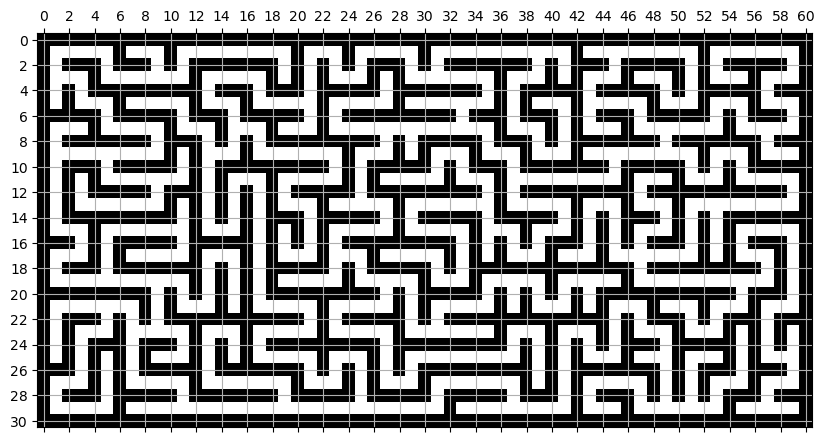

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import spy

plt.figure(figsize=(10, 10))
spy(maze.blocks)
plt.xticks(np.arange(0, maze.blocks.shape[1], 2))
plt.yticks(np.arange(0, maze.blocks.shape[0], 2))
plt.grid(axis='both', which='both')

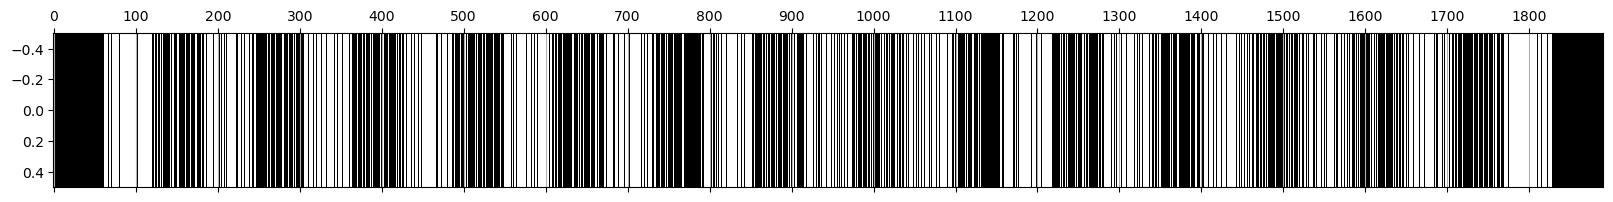

In [30]:
# flattening maze.blocks
flatten_blocks = maze.blocks.flatten().reshape(1, -1)

plt.figure(figsize=(20, 2))
spy(flatten_blocks, aspect='auto')
plt.xticks(np.arange(0, maze.blocks.shape[1] * maze.blocks.shape[0], 100))
plt.grid(axis='x')

In [5]:
"""running = True

while running:
    # visualize maze
    pygame.event.clear() 
    pygame.image.save(screen, 'images/maze.png')
    event = pygame.event.wait() 

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            # quit pygame event
            running = False
            pygame.quit()
            exit()
"""

"running = True\n\nwhile running:\n    # visualize maze\n    pygame.event.clear() \n    pygame.image.save(screen, 'images/maze.png')\n    event = pygame.event.wait() \n\n    for event in pygame.event.get():\n        if event.type == pygame.QUIT:\n            # quit pygame event\n            running = False\n            pygame.quit()\n            exit()\n"

In [6]:
# dispaly figure in 'maze.png'
"""from IPython.display import Image
Image(filename='images/maze.png', width=400)"""

"from IPython.display import Image\nImage(filename='images/maze.png', width=400)"

### make env

In [7]:
import gymnasium as gym
import matrix_mdp
from tensorflow.sparse import SparseTensor as sparse

#### set param (default)
n_states = 4

n_actions = 2

p_0 = np.ones((n_states, )) / n_states

r = np.ones((n_states, n_states, n_actions))

p = np.ones((n_states, n_states, n_actions)) / n_states

In [8]:
n_states =  np.sum(maze.blocks == 0) # states cardinality: walkable cells
n_actions = 4 # actions cardinality: up, down, left, right

p_0 = np.ones((n_states, )) / n_states # prior distribution
p = sparse(indices=[(0,0,0)], values=[0], dense_shape=(n_states, n_states, n_actions)) # transition probability
r = sparse(indices=[(0,0,0)], values=[0], dense_shape=(n_states, n_states, n_actions)) # reward function

In [10]:
# init environment
"""env = gym.make('matrix_mdp/MatrixMDP-v0', p_0=p_0, p=p, r=r, render_mode="human")
env.reset() # reset the environment to the initial state (mandatory before take an action)
for i in range(10):
    #env.render()
    env.step(1)
    print(env.state)
"""

TypeError: 'SparseTensor' object is not subscriptable was raised from the environment creator for matrix_mdp/MatrixMDP-v0 with kwargs ({'p_0': array([0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235, 0.00111235,
       0.00111235, 0.00111235, 0.00111235, 0.00111235]), 'p': SparseTensor(indices=tf.Tensor([[0 0 0]], shape=(1, 3), dtype=int64), values=tf.Tensor([0], shape=(1,), dtype=int32), dense_shape=tf.Tensor([899 899   4], shape=(3,), dtype=int64)), 'r': SparseTensor(indices=tf.Tensor([[0 0 0]], shape=(1, 3), dtype=int64), values=tf.Tensor([0], shape=(1,), dtype=int32), dense_shape=tf.Tensor([899 899   4], shape=(3,), dtype=int64)), 'render_mode': 'human'})